## Loading the Data

- Importing the data from kaggle
- Use pytorch data loaders for efficient and flexible data loading

- Plotting basic visualisations

In [ ]:
# Upload kaggle.json and configure Kaggle API
from google.colab import files
import os, shutil, glob

files.upload()  # Upload kaggle.json
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

# Download BreaKHis dataset
import kagglehub
path = kagglehub.dataset_download("ambarish/breakhis")

# Set up dataset path
dataset_images_path = os.path.join(path, "BreaKHis_v1", "BreaKHis_v1", "histology_slides", "breast")
destination = "/content/breakhis_dataset"
if not os.path.exists(destination):
    shutil.copytree(dataset_images_path, destination)

# Check dataset structure
print("Dataset available at:", destination)
print("Top-level folders:", os.listdir(destination))

# Count images by class and magnification
benign_images = glob.glob(os.path.join(destination, "benign", "**", "*.png"), recursive=True)
malignant_images = glob.glob(os.path.join(destination, "malignant", "**", "*.png"), recursive=True)

magnifications = ["40X", "100X", "200X", "400X"]
image_counts = {mag: len(glob.glob(os.path.join(destination, "**", mag, "*.png"), recursive=True)) for mag in magnifications}

print(f"Benign images: {len(benign_images)}")
print(f"Malignant images: {len(malignant_images)}")
print(f"Total images: {len(benign_images) + len(malignant_images)}")
print("Image counts by magnification:", image_counts)

Saving kaggle.json to kaggle.json


100%|██████████| 3.99G/3.99G [00:43<00:00, 97.9MB/s]

Extracting files...


Dataset available at: /content/breakhis_dataset
Top-level folders: ['malignant', 'README.txt', 'benign', 'count_files.sh']
Benign images: 2480
Malignant images: 5429
Total images: 7909
Image counts by magnification: {'40X': 1995, '100X': 2081, '200X': 2013, '400X': 1820}


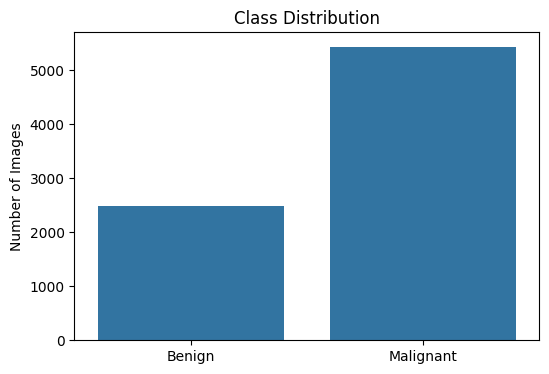

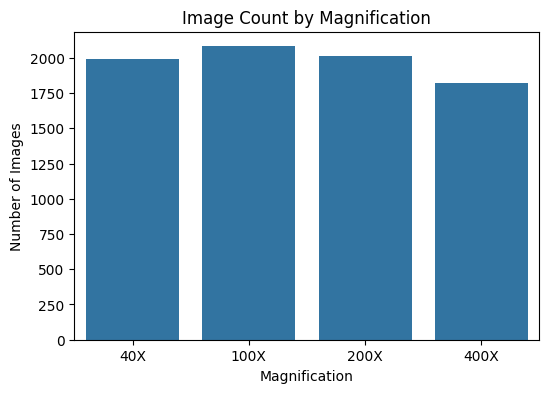

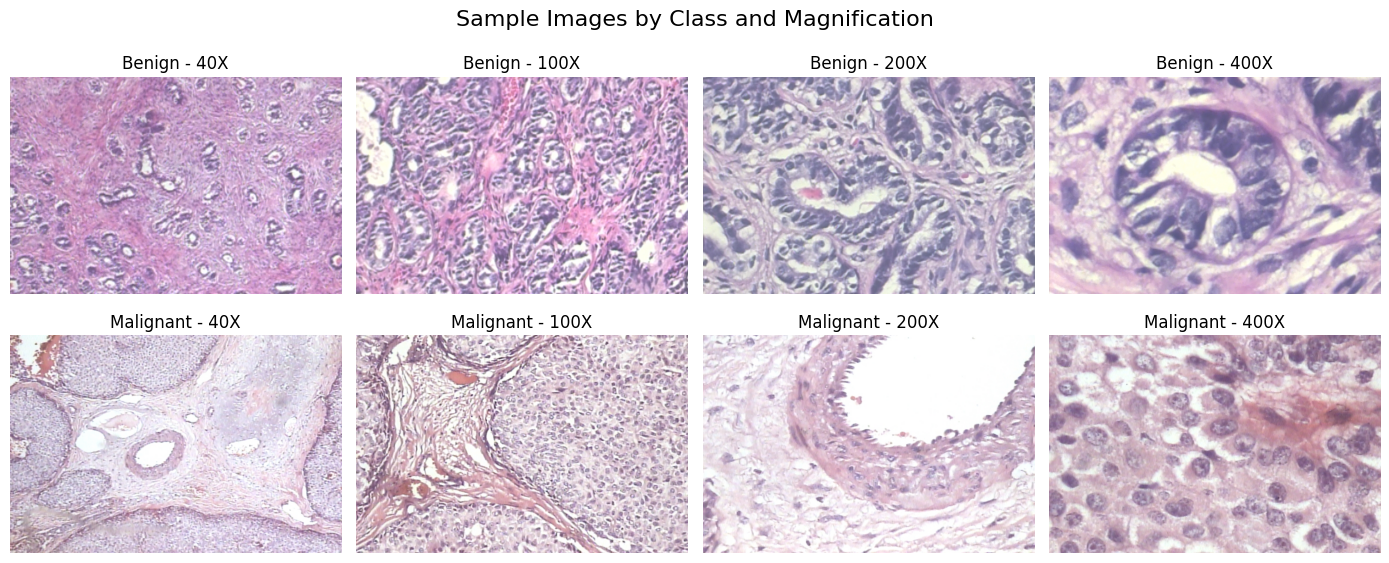

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#Visualisations
# Class distribution bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=["Benign", "Malignant"], y=[len(benign_images), len(malignant_images)])
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

# Magnification distribution bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.title("Image Count by Magnification")
plt.ylabel("Number of Images")
plt.xlabel("Magnification")
plt.show()

# Display sample images from each class and magnification
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
sample_images = []

for i, mag in enumerate(magnifications):
    benign_sample = glob.glob(os.path.join(destination, "benign", "**", mag, "*.png"), recursive=True)[0]
    malignant_sample = glob.glob(os.path.join(destination, "malignant", "**", mag, "*.png"), recursive=True)[0]
    sample_images.append((benign_sample, malignant_sample))

    axes[0, i].imshow(Image.open(benign_sample))
    axes[0, i].set_title(f"Benign - {mag}")
    axes[0, i].axis("off")

    axes[1, i].imshow(Image.open(malignant_sample))
    axes[1, i].set_title(f"Malignant - {mag}")
    axes[1, i].axis("off")

plt.suptitle("Sample Images by Class and Magnification", fontsize=16)
plt.tight_layout()
plt.show()

## EfficientNet B0 without Oversampling
- With data augmentation
- learning rate scheduler
- 10 epochs
- batch size = 10
- Adam optimizer with a learning rate = 0.0001
- BCEWithLogitLoss loss function

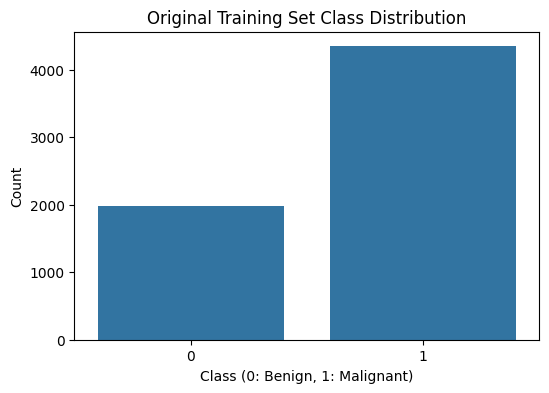

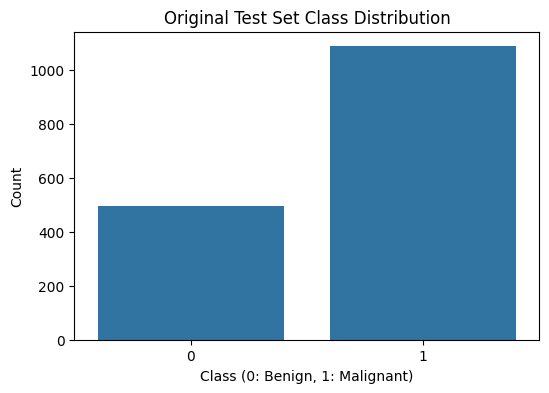

100%|██████████| 198/198 [01:24<00:00,  2.33it/s]


Epoch [1/10] Loss: 0.2973


100%|██████████| 198/198 [01:27<00:00,  2.27it/s]


Epoch [2/10] Loss: 0.1139


100%|██████████| 198/198 [01:26<00:00,  2.30it/s]


Epoch [3/10] Loss: 0.0799


100%|██████████| 198/198 [01:26<00:00,  2.28it/s]


Epoch [4/10] Loss: 0.0529


100%|██████████| 198/198 [01:25<00:00,  2.32it/s]


Epoch [5/10] Loss: 0.0375


100%|██████████| 198/198 [01:27<00:00,  2.27it/s]


Epoch [6/10] Loss: 0.0407


100%|██████████| 198/198 [01:25<00:00,  2.32it/s]


Epoch [7/10] Loss: 0.0285


100%|██████████| 198/198 [01:26<00:00,  2.30it/s]


Epoch [8/10] Loss: 0.0263


100%|██████████| 198/198 [01:24<00:00,  2.34it/s]


Epoch [9/10] Loss: 0.0203


100%|██████████| 198/198 [01:25<00:00,  2.31it/s]

Epoch [10/10] Loss: 0.0206


Test Accuracy: 99.05%
ROC AUC Score: 0.9996
              precision    recall  f1-score   support

      Benign       0.99      0.98      0.98       496
   Malignant       0.99      0.99      0.99      1086

    accuracy                           0.99      1582
   macro avg       0.99      0.99      0.99      1582
weighted avg       0.99      0.99      0.99      1582



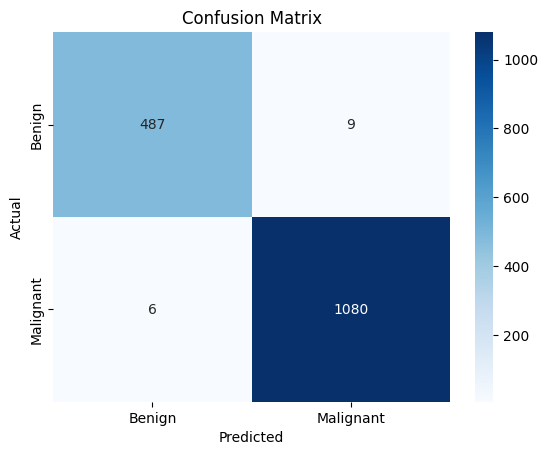

              precision    recall  f1-score   support

      Benign       0.99      0.98      0.98       496
   Malignant       0.99      0.99      0.99      1086

    accuracy                           0.99      1582
   macro avg       0.99      0.99      0.99      1582
weighted avg       0.99      0.99      0.99      1582

Model saved as efficientnet_breakhis_noOversampling.pth


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


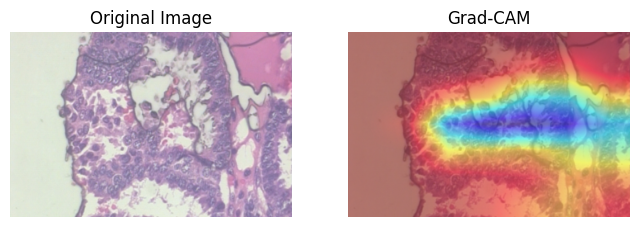

Model saved as efficientnet_breakhis_noOversampling.pth


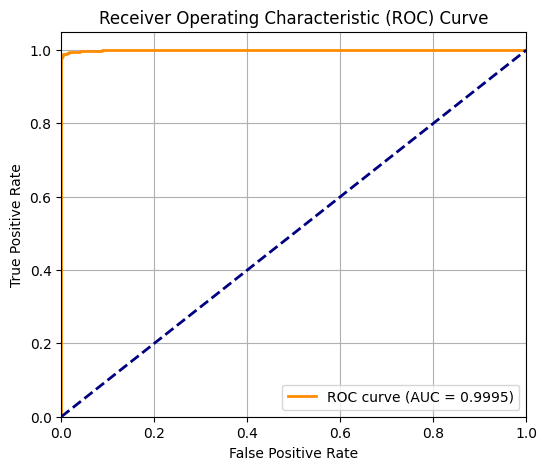

In [ ]:
import os, glob, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader


# Define dataset path
dataset_path = "/content/breakhis_dataset"

# Define transformations
IMG_SIZE = 224
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset paths
data = []
for class_name in ["benign", "malignant"]:
    class_path = os.path.join(dataset_path, class_name, "SOB")
    if os.path.isdir(class_path):
        for subtype in os.listdir(class_path):
            subtype_path = os.path.join(class_path, subtype)
            if os.path.isdir(subtype_path):
                for sample in os.listdir(subtype_path):
                    sample_path = os.path.join(subtype_path, sample)
                    if os.path.isdir(sample_path):
                        for mag in ["40X", "100X", "200X", "400X"]:
                            mag_path = os.path.join(sample_path, mag)
                            if os.path.isdir(mag_path):
                                for img_path in glob.glob(os.path.join(mag_path, "*.png")):
                                    data.append([img_path, class_name, mag])

# Create DataFrame
df = pd.DataFrame(data, columns=["image_path", "label", "magnification"])
df["label"] = df["label"].map({"benign": 0, "malignant": 1})

# Use the original split without oversampling
# Split dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])

# Show class distribution for training set
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df["label"])
plt.title("Original Training Set Class Distribution")
plt.xlabel("Class (0: Benign, 1: Malignant)")
plt.ylabel("Count")
plt.show()

# Show class distribution for test set
plt.figure(figsize=(6, 4))
sns.countplot(x=test_df["label"])
plt.title("Original Test Set Class Distribution")
plt.xlabel("Class (0: Benign, 1: Malignant)")
plt.ylabel("Count")
plt.show()


class BreakHisDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image = Image.open(self.dataframe.iloc[idx]["image_path"]).convert("RGB")
        label = self.dataframe.iloc[idx]["label"]
        return self.transform(image), label

train_loader = DataLoader(BreakHisDataset(train_df, transform), batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(BreakHisDataset(test_df, transform), batch_size=32, shuffle=False, num_workers=2, pin_memory=True)


# Create Datasets using original data
train_dataset = BreakHisDataset(train_df, transform=transform)
test_dataset = BreakHisDataset(test_df, transform=transform)

# Load EfficientNet model
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.classifier = nn.Sequential(nn.Linear(model.classifier[1].in_features, 1))
model.to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = model(images).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {total_loss/len(train_loader):.4f}")


# Evaluation on Balanced Test Set
model.eval()
predictions, true_labels, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device, dtype=torch.float32)
        outputs = model(images).squeeze()
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).int()

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
roc_auc = roc_auc_score(true_labels, all_probs)

print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(classification_report(true_labels, predictions, target_names=["Benign", "Malignant"]))

# Confusion Matrix
sns.heatmap(confusion_matrix(true_labels, predictions), annot=True, fmt='d',
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"], cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Classification Report
print(classification_report(true_labels, predictions, target_names=["Benign", "Malignant"]))

# Save Model
torch.save(model.state_dict(), "efficientnet_breakhis_noOversampling.pth")
print("Model saved as efficientnet_breakhis_noOversampling.pth")


import cv2
import numpy as np

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, _, __, output):
        self.activations = output.detach()

    def save_gradient(self, _, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate_cam(self):
        pooled_grad = torch.mean(self.gradients, dim=[0, 2, 3])
        for i in range(self.activations.shape[1]):
            self.activations[:, i, :, :] *= pooled_grad[i]
        heatmap = torch.mean(self.activations, dim=1).squeeze().cpu().numpy()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap)
        return heatmap

def apply_heatmap(image_path, heatmap, alpha=0.5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title("Grad-CAM")
    plt.axis("off")
    plt.show()

# Visualize Grad-CAM on a test image
sample_image_path = test_df.iloc[0]["image_path"]
sample_image = Image.open(sample_image_path).convert("RGB")
sample_tensor = transform(sample_image).unsqueeze(0).to(device)

grad_cam = GradCAM(model, model.features[-1])
model.eval()
output = model(sample_tensor).squeeze()
output.backward()
heatmap = grad_cam.generate_cam()
apply_heatmap(sample_image_path, heatmap)

torch.save(model.state_dict(), "efficientnet_breakhis_noOversampling.pth")
print("Model saved as efficientnet_breakhis_noOversampling.pth")


from sklearn.metrics import roc_curve, roc_auc_score

# Load the saved model (if not already loaded)
model = models.efficientnet_b0(weights=None)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(nn.Linear(num_features, 1))
model.load_state_dict(torch.load("efficientnet_breakhis_noOversampling.pth", map_location=device))
model = model.to(device)
model.eval()

# Get predicted probabilities on test set
all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader_resampled:
        images = images.to(device)
        outputs = model(images).squeeze()
        probs = torch.sigmoid(outputs)
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.numpy())

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = roc_auc_score(all_labels, all_probs)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## EfficientNet B0 with Oversampling
- With data augmentation
- learning rate scheduler
- 10 epochs
- batch size = 10
- Adam optimizer with a learning rate = 0.0001
- BCEWithLogitLoss loss function

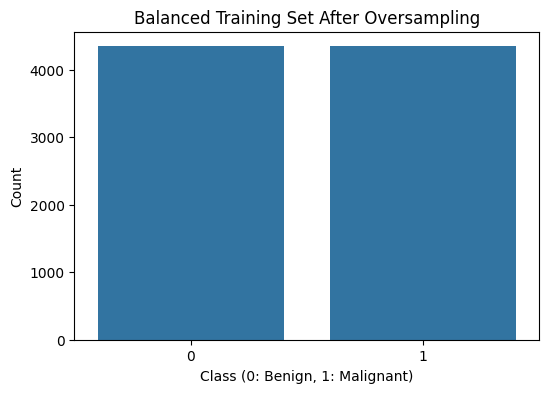

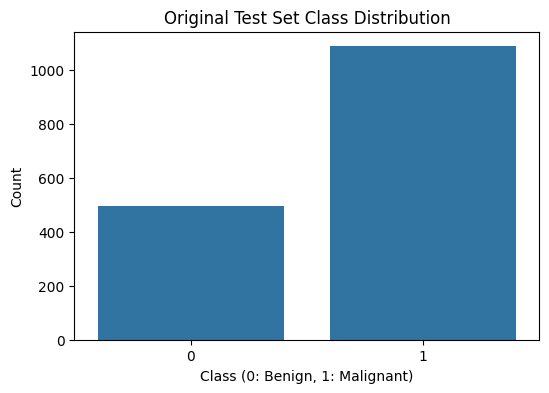

100%|██████████| 272/272 [01:57<00:00,  2.32it/s]


Epoch [1/10], Loss: 0.2641


100%|██████████| 272/272 [01:55<00:00,  2.35it/s]


Epoch [2/10], Loss: 0.0905


100%|██████████| 272/272 [01:56<00:00,  2.33it/s]


Epoch [3/10], Loss: 0.0579


100%|██████████| 272/272 [01:57<00:00,  2.32it/s]


Epoch [4/10], Loss: 0.0342


100%|██████████| 272/272 [01:55<00:00,  2.35it/s]


Epoch [5/10], Loss: 0.0204


100%|██████████| 272/272 [01:56<00:00,  2.33it/s]


Epoch [6/10], Loss: 0.0234


100%|██████████| 272/272 [01:57<00:00,  2.32it/s]


Epoch [7/10], Loss: 0.0173


100%|██████████| 272/272 [01:56<00:00,  2.34it/s]


Epoch [8/10], Loss: 0.0169


100%|██████████| 272/272 [01:57<00:00,  2.32it/s]


Epoch [9/10], Loss: 0.0151


100%|██████████| 272/272 [01:55<00:00,  2.35it/s]

Epoch [10/10], Loss: 0.0103


Test Accuracy: 98.74%


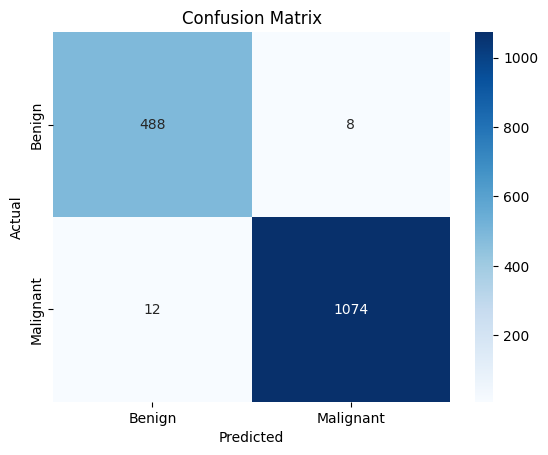

              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98       496
   Malignant       0.99      0.99      0.99      1086

    accuracy                           0.99      1582
   macro avg       0.98      0.99      0.99      1582
weighted avg       0.99      0.99      0.99      1582

Model saved as efficientnet_breakhis_oversampled.pth


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


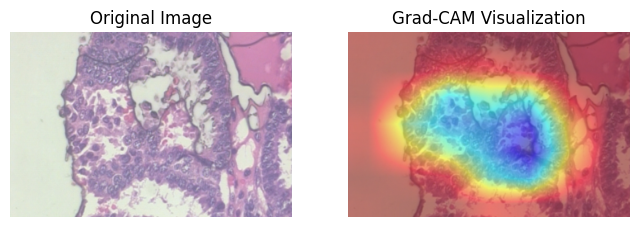

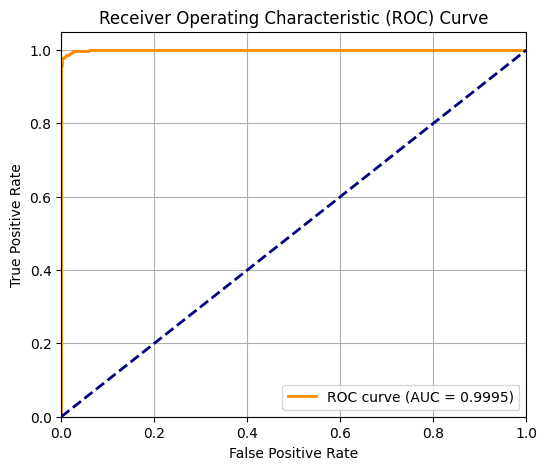

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

# Define dataset path
dataset_path = "/content/breakhis_dataset"

# Define transformations
IMG_SIZE = 224
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset paths
data = []
for class_name in ["benign", "malignant"]:
    class_path = os.path.join(dataset_path, class_name, "SOB")
    if os.path.isdir(class_path):
        for subtype in os.listdir(class_path):
            subtype_path = os.path.join(class_path, subtype)
            if os.path.isdir(subtype_path):
                for sample in os.listdir(subtype_path):
                    sample_path = os.path.join(subtype_path, sample)
                    if os.path.isdir(sample_path):
                        for mag in ["40X", "100X", "200X", "400X"]:
                            mag_path = os.path.join(sample_path, mag)
                            if os.path.isdir(mag_path):
                                for img_path in glob.glob(os.path.join(mag_path, "*.png")):
                                    data.append([img_path, class_name, mag])

# Create DataFrame
df = pd.DataFrame(data, columns=["image_path", "label", "magnification"])
df["label"] = df["label"].map({"benign": 0, "malignant": 1})

# Split dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])

# ** Apply Oversampling to Training Set **
ros = RandomOverSampler(random_state=47)
X_train_resampled, y_train_resampled = ros.fit_resample(train_df["image_path"].values.reshape(-1, 1), train_df["label"])

# Convert back to DataFrame
train_df_resampled = pd.DataFrame({"image_path": X_train_resampled.flatten(), "label": y_train_resampled})

# Verify Class Distribution for Training Set
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df_resampled["label"])
plt.title("Balanced Training Set After Oversampling")
plt.xlabel("Class (0: Benign, 1: Malignant)")
plt.ylabel("Count")
plt.show()

# Use the original test set without oversampling
test_df_resampled = test_df.copy()

# Show class distribution of original test set
plt.figure(figsize=(6, 4))
sns.countplot(x=test_df_resampled["label"])
plt.title("Original Test Set Class Distribution")
plt.xlabel("Class (0: Benign, 1: Malignant)")
plt.ylabel("Count")
plt.show()


# Define Custom Dataset
class BreakHisDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]["image_path"]
        label = self.dataframe.iloc[idx]["label"]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Create Datasets
train_dataset = BreakHisDataset(train_df_resampled, transform=transform)
test_dataset_resampled = BreakHisDataset(test_df_resampled, transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader_resampled = DataLoader(test_dataset_resampled, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

# Load EfficientNet model
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(nn.Linear(num_features, 1))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = model(images).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    scheduler.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluation on Balanced Test Set
model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for images, labels in test_loader_resampled:
        images, labels = images.to(device), labels.to(device, dtype=torch.float32)
        outputs = model(images).squeeze()
        preds = torch.sigmoid(outputs) > 0.5
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(true_labels, predictions, target_names=["Benign", "Malignant"]))

# Save Model
torch.save(model.state_dict(), "efficientnet_breakhis_oversampled.pth")
print("Model saved as efficientnet_breakhis_oversampled.pth")


import cv2
import numpy as np

# Grad-CAM Implementation
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Hook for gradients
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate_cam(self):
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        for i in range(self.activations.shape[1]):
            self.activations[:, i, :, :] *= pooled_gradients[i]
        heatmap = torch.mean(self.activations, dim=1).squeeze()
        heatmap = np.maximum(heatmap.cpu().numpy(), 0)
        heatmap /= np.max(heatmap)
        return heatmap

def apply_heatmap(image_path, heatmap, alpha=0.5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

    # Convert to heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on the original image
    superimposed_img = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

    # Display the result
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title("Grad-CAM Visualization")
    plt.axis("off")

    plt.show()

# Load a sample image from the test dataset
sample_idx = 0  # Change index to visualize different images
sample_image_path = test_df_resampled.iloc[sample_idx]["image_path"]
sample_label = test_df_resampled.iloc[sample_idx]["label"]

# Load image
image = Image.open(sample_image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0).to(device)

# Set up Grad-CAM
target_layer = model.features[-1]  # Last convolutional layer of EfficientNet-B0
grad_cam = GradCAM(model, target_layer)

# Perform forward and backward pass
model.eval()
output = model(image_tensor).squeeze()
output.backward()

# Generate and apply Grad-CAM heatmap
heatmap = grad_cam.generate_cam()
apply_heatmap(sample_image_path, heatmap)

from sklearn.metrics import roc_curve, roc_auc_score

# Load the saved model (if not already loaded)
model = models.efficientnet_b0(weights=None)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(nn.Linear(num_features, 1))
model.load_state_dict(torch.load("efficientnet_breakhis_oversampled.pth", map_location=device))
model = model.to(device)
model.eval()

# Get predicted probabilities on test set
all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader_resampled:
        images = images.to(device)
        outputs = model(images).squeeze()
        probs = torch.sigmoid(outputs)
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.numpy())

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = roc_auc_score(all_labels, all_probs)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Trainig and Testing on a different datase: IDC Breast Cancer Histology Images
- Binary classification

In [ ]:
import kagglehub

# Download the IDC dataset
path = kagglehub.dataset_download("kasikrit/idc-dataset")
print("Path to dataset files:", path)

import os

for root, dirs, files in os.walk(path):
    print(root)
    for d in dirs:
        print("  └──", d)
    break


100%|██████████| 1.55G/1.55G [00:19<00:00, 84.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1
/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1
  └── IDC


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# base path
base_path = "/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1/IDC"

# Create datasets
train_dataset = datasets.ImageFolder(root=f"{base_path}/training", transform=transform)
val_dataset = datasets.ImageFolder(root=f"{base_path}/validation", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{base_path}/testing", transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Confirm class labels
print(train_dataset.classes)  # ['0', '1']


['0', '1']


In [ ]:
import torch
from torchvision import models

# Load base model
model = models.efficientnet_b0(pretrained=False)

# Match the saved model structure (1 output neuron for binary classification)
model.classifier = torch.nn.Sequential(
    torch.nn.Linear(1280, 1)
)

# Load the saved weights
model.load_state_dict(torch.load("efficientnet_breakhis.pth"))

# Move to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
from torchvision import models
import torch.nn as nn

# Load pre-trained EfficientNet-B0
model = models.efficientnet_b0(weights="EfficientNet_B0_Weights.DEFAULT")

# Freeze all layers if you want to use it as a feature extractor
for param in model.parameters():
    param.requires_grad = False

# Modify the classifier for binary classification
model.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(model.classifier[1].in_features, 2)  # 2 output classes (Benign, Malignant)
)


[Epoch 1] Loss: 2199.1080, Accuracy: 84.91%
[Epoch 2] Loss: 2180.7632, Accuracy: 85.07%
[Epoch 3] Loss: 2172.6638, Accuracy: 85.15%
[Epoch 4] Loss: 2173.2967, Accuracy: 85.13%
[Epoch 5] Loss: 2172.8655, Accuracy: 85.11%
[Epoch 6] Loss: 2179.3202, Accuracy: 85.10%
[Epoch 7] Loss: 2173.3840, Accuracy: 85.15%
[Epoch 8] Loss: 2170.7692, Accuracy: 85.19%
[Epoch 9] Loss: 2174.8124, Accuracy: 85.16%
[Epoch 10] Loss: 2179.2977, Accuracy: 85.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     39793
           1       0.77      0.74      0.75     15712

    accuracy                           0.86     55505
   macro avg       0.84      0.83      0.83     55505
weighted avg       0.86      0.86      0.86     55505



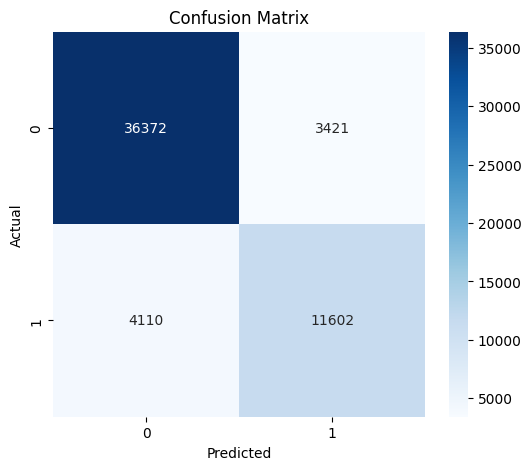

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained EfficientNet-B0
model = models.efficientnet_b0(weights="EfficientNet_B0_Weights.DEFAULT")
for param in model.parameters():
    param.requires_grad = False  # Freeze feature extractor
model.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(model.classifier[1].in_features, 2)  # Binary output
)
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])



# Load Data
train_dataset = datasets.ImageFolder(root=f"{base_path}/training", transform=transform)
val_dataset = datasets.ImageFolder(root=f"{base_path}/validation", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{base_path}/testing", transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Train Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"[Epoch {epoch+1}] Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

# Evaluation
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_dataset.classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Testing on the IDC dataset

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.57      0.65     39793
           1       0.33      0.54      0.41     15712

    accuracy                           0.56     55505
   macro avg       0.55      0.56      0.53     55505
weighted avg       0.64      0.56      0.58     55505



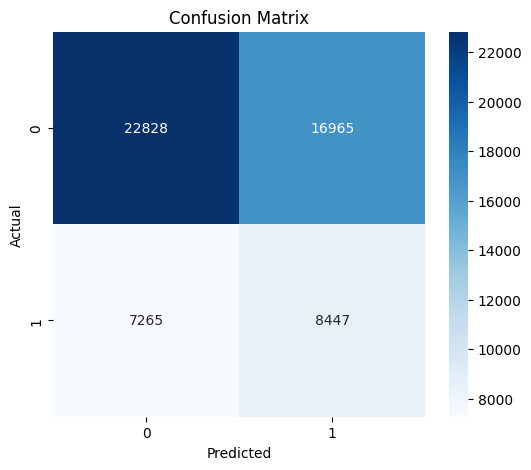

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 3. Load Test Data
test_dataset = datasets.ImageFolder(root=f"{base_path}/testing", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

from torchvision import models
import torch.nn as nn
import torch

# Load base EfficientNet-B0
model = models.efficientnet_b0(weights=None)


model.classifier = nn.Sequential(
    nn.Linear(model.classifier[1].in_features, 1)
)


model.load_state_dict(torch.load('efficientnet_breakhis.pth'))

model.to(device)
model.eval()

# 5. Evaluate on Test Set
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).long().squeeze(1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


# 6. Results
print("Classification Report:\n", classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Testing on the IDC Breast Cancer Dataset

100%|██████████| 1.55G/1.55G [00:18<00:00, 91.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1
/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1
  └── IDC

====== Results for No Oversampling ======
              precision    recall  f1-score   support

           0       0.72      0.03      0.06     39793
           1       0.28      0.97      0.44     15712

    accuracy                           0.30     55505
   macro avg       0.50      0.50      0.25     55505
weighted avg       0.60      0.30      0.17     55505



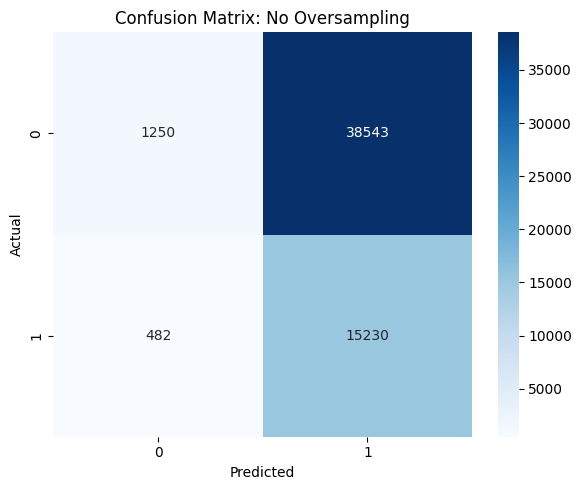


====== Results for Oversampled ======
              precision    recall  f1-score   support

           0       0.76      0.52      0.62     39793
           1       0.33      0.59      0.42     15712

    accuracy                           0.54     55505
   macro avg       0.54      0.55      0.52     55505
weighted avg       0.64      0.54      0.56     55505



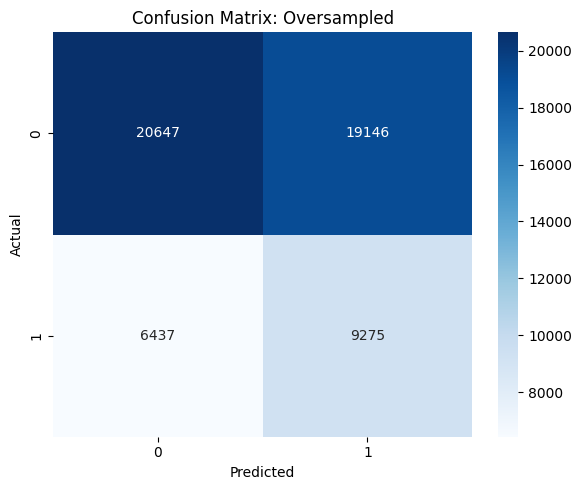

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Device Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transform (same for both models)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

import kagglehub

# Download the IDC dataset
path = kagglehub.dataset_download("kasikrit/idc-dataset")
print("Path to dataset files:", path)

import os

for root, dirs, files in os.walk(path):
    print(root)
    for d in dirs:
        print("  └──", d)
    break  # Just print the top level first

# Load IDC Test Dataset
base_path = "/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1/IDC"
test_dataset = datasets.ImageFolder(root=f"{base_path}/testing", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
class_names = test_dataset.classes  # ['0', '1']

# Function: Load Model
def load_model(model_path):
    model = models.efficientnet_b0(weights=None)
    model.classifier = nn.Sequential(
        nn.Linear(model.classifier[1].in_features, 1)  # Binary classifier (sigmoid)
    )
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Function: Evaluate Model
def evaluate_model(model, name):
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).long().squeeze(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Print results
    print(f"\n====== Results for {name} ======")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Load & Evaluate: No Oversampling
model_no_os = load_model("efficientnet_breakhis_noOversampling.pth")
evaluate_model(model_no_os, "No Oversampling")

# Load & Evaluate: Oversampled
model_os = load_model("efficientnet_breakhis_oversampled.pth")
evaluate_model(model_os, "Oversampled")


## Training and Testing on the Breast Cancer IDC Dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset path
base_path = "/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1/IDC"

# Load Datasets
train_dataset = datasets.ImageFolder(root=f"{base_path}/training", transform=transform)
val_dataset   = datasets.ImageFolder(root=f"{base_path}/validation", transform=transform)
test_dataset  = datasets.ImageFolder(root=f"{base_path}/testing", transform=transform)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
def train_model(model, model_name, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

    print(f"\nTraining: {model_name}")
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = 100 * correct / total
        print(f"[Epoch {epoch+1}] Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

    # Save model
    torch.save(model.state_dict(), f"{model_name}_idc.pth")
    print(f"Saved model as {model_name}_idc.pth")
    return model


In [ ]:
def evaluate_model(model, model_name):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    print(f"\n Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=test_dataset.classes))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()


Training: efficientnet_breakhis_noOversampling
[Epoch 1] Loss: 2197.7114, Accuracy: 84.96%
[Epoch 2] Loss: 2175.7429, Accuracy: 85.12%
[Epoch 3] Loss: 2179.2947, Accuracy: 85.02%
[Epoch 4] Loss: 2180.5972, Accuracy: 85.04%
[Epoch 5] Loss: 2177.4330, Accuracy: 85.10%
[Epoch 6] Loss: 2181.4942, Accuracy: 85.08%
[Epoch 7] Loss: 2171.0337, Accuracy: 85.16%
[Epoch 8] Loss: 2173.9169, Accuracy: 85.06%
[Epoch 9] Loss: 2181.5127, Accuracy: 85.10%
[Epoch 10] Loss: 2180.2510, Accuracy: 85.03%
Saved model as efficientnet_breakhis_noOversampling_idc.pth

📊 Classification Report for EfficientNet No Oversampling:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     39793
           1       0.74      0.79      0.76     15712

    accuracy                           0.86     55505
   macro avg       0.83      0.84      0.83     55505
weighted avg       0.86      0.86      0.86     55505



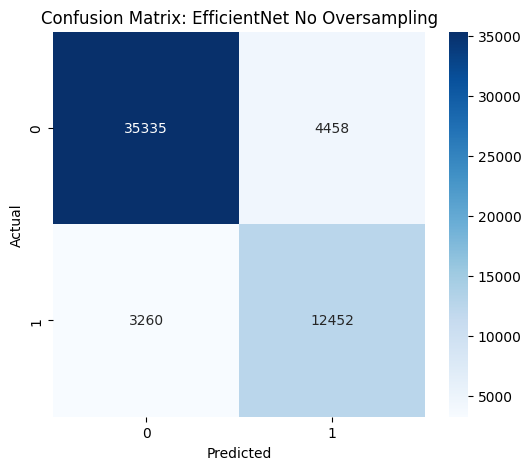

In [ ]:
# Model 1: No Oversampling version
model_no_os = models.efficientnet_b0(weights="EfficientNet_B0_Weights.DEFAULT")
for param in model_no_os.parameters():
    param.requires_grad = False
model_no_os.classifier = nn.Sequential(
    nn.Dropout(0.3, inplace=True),
    nn.Linear(model_no_os.classifier[1].in_features, 2)
)
model_no_os = model_no_os.to(device)

# Train and evaluate
model_no_os = train_model(model_no_os, "efficientnet_breakhis_noOversampling")
evaluate_model(model_no_os, "EfficientNet No Oversampling")


In [ ]:
# Model 2: Oversampled version
model_os = models.efficientnet_b0(weights="EfficientNet_B0_Weights.DEFAULT")
for param in model_os.parameters():
    param.requires_grad = False
model_os.classifier = nn.Sequential(
    nn.Dropout(0.3, inplace=True),
    nn.Linear(model_os.classifier[1].in_features, 2)
)
model_os = model_os.to(device)

# Train and evaluate
model_os = train_model(model_os, "efficientnet_breakhis_oversampled")
evaluate_model(model_os, "EfficientNet With Oversampling")
